<a href="https://colab.research.google.com/github/Bholarnley/Python/blob/main/White_Wine_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# importing neccessary libraries

In [7]:
# importing the white wine dataset and storing in df

filepath = r"/content/white wine quality.csv"

df = pd.read_csv(filepath, sep = ';')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
# checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
# checking for outliers

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

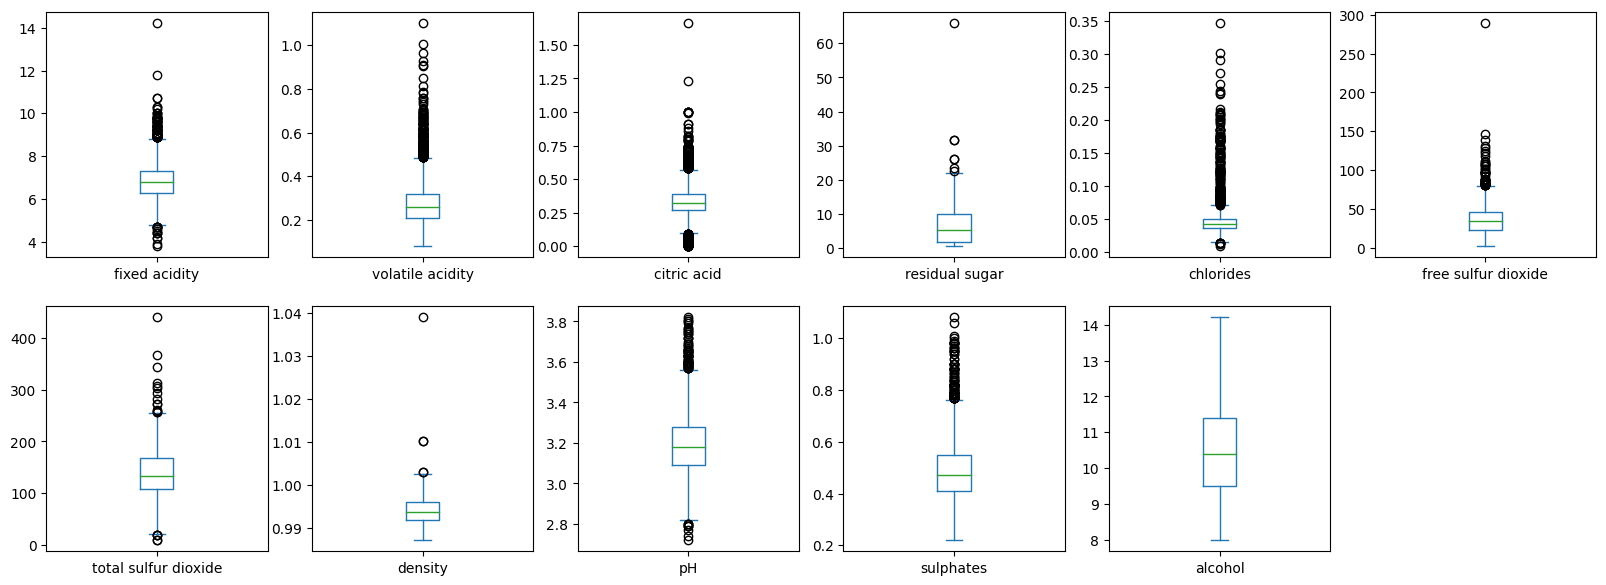

In [14]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df[columns].plot(
    figsize=(20, 7),
    kind = 'box',
    subplots = True,
    layout = (2, 6)

);

In [17]:
# spliting the data into X and y

X = df.drop('quality', axis = 1)

# encoding y into good as 1 and 0 for bad
y = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

<Axes: xlabel='quality'>

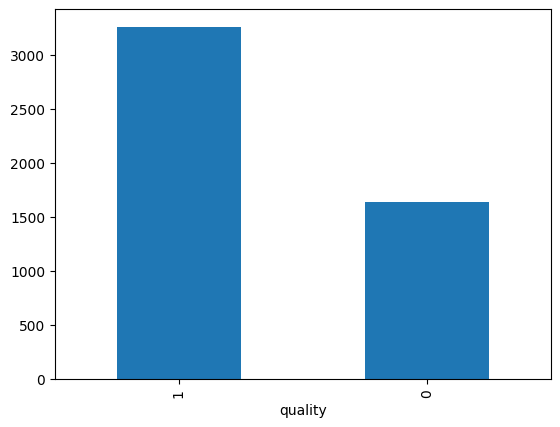

In [19]:
# chaecking for inbalance in data

y.value_counts().plot(kind='bar')

In [23]:
# using SMOTE for balancing

smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

<Axes: xlabel='quality'>

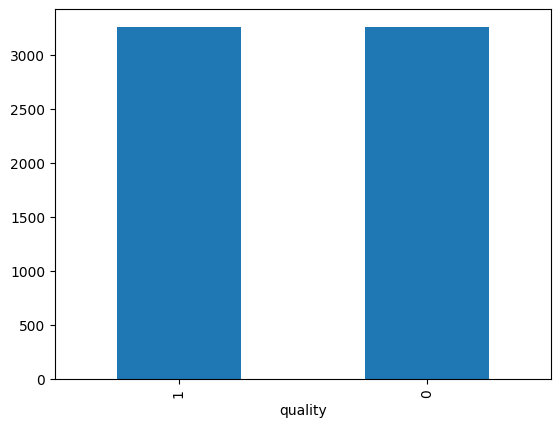

In [24]:
y_resampled.value_counts().plot(kind='bar')

In [27]:
# splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [28]:
print(X_train.shape)
print(X_resampled.shape)

(5212, 11)
(6516, 11)


In [29]:
# CREATING MODEL INSTANCES

rfc = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC()

RANDOM FOREST CLASSIFIER MODEL


In [30]:
# FITTING THE MODEL

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred_rfc = rfc.predict(X_test)

In [34]:
# SCORES TESTING FOR RFC
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

In [36]:
print(f'The accuracy score for Random Forest Classifier is{accuracy: .2f}.')
print(f'The precision score Random Forest Classifier is{precision: .2f}.')
print(f'The recall score Random Forest Classifier is{recall: .2f}.')
print(f'The f1 score Random Forest Classifier is{f1: .2f}.')

The accuracy score for Random Forest Classifier is 0.86.
The precision score Random Forest Classifier is 0.88.
The recall score Random Forest Classifier is 0.85.
The f1 score Random Forest Classifier is 0.86.


LOGISTICS REGRESSION MODEL

In [37]:
# FITTING THE MODEL

lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred_lr = lr.predict(X_test)

In [42]:
# SCORES TESTING FOR LOGISTICS REGRESSION
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

In [43]:
print(f'The accuracy score for LogisticRegression is{accuracy: .2f}.')
print(f'The precision score LogisticRegression is{precision: .2f}.')
print(f'The recall score LogisticRegression is{recall: .2f}.')
print(f'The f1 score LogisticRegression is{f1: .2f}.')

The accuracy score for LogisticRegression is 0.73.
The precision score LogisticRegression is 0.75.
The recall score LogisticRegression is 0.70.
The f1 score LogisticRegression is 0.72.


SVC MODEL

In [45]:
# FITTING THE MODEL

svc.fit(X_train, y_train)

SVC()

In [46]:
# predicting the model in a variable

y_pred_svc = svc.predict(X_test)

In [47]:
# SCORES TESTING FOR SVC

accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

In [48]:
print(f'The accuracy score for SVC is{accuracy: .2f}.')
print(f'The precision score SVC is{precision: .2f}.')
print(f'The recall score SVC is{recall: .2f}.')
print(f'The f1 score SVC is{f1: .2f}.')

The accuracy score for SVC is 0.68.
The precision score SVC is 0.73.
The recall score SVC is 0.60.
The f1 score SVC is 0.66.


In [50]:
# Creating a dataframe to tabualarise the findings

comparison_df = pd.DataFrame(
    {
        'Models': [
            'Random Forest Classifier',
            'Logistics Regression',
            'Support Vector Classifier'
        ],

        'Accuracy': [
            accuracy_score(y_test, y_pred_rfc),
            accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_svc)
        ],

        'Precision': [
            precision_score(y_test, y_pred_rfc),
            precision_score(y_test, y_pred_lr),
            precision_score(y_test, y_pred_svc)
        ],

        'Recall': [
            recall_score(y_test, y_pred_rfc),
            recall_score(y_test, y_pred_lr),
            recall_score(y_test, y_pred_svc)
        ],

        'F1 Score': [
            f1_score(y_test, y_pred_rfc),
            f1_score(y_test, y_pred_lr),
            f1_score(y_test, y_pred_svc)
        ]
    }
)

In [52]:
comparison_df

,Models,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.861963,0.880620,0.846498,0.863222
1,Logistics Regression,0.726227,0.751603,0.698957,0.724324
2,Support Vector Classifier,0.677914,0.728597,0.596125,0.655738
